In [1]:
import keras
import keras.layers as kl

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce 940MX (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)


In [2]:
print(keras.__version__)

2.0.6


In [3]:
import pandas as pd
import numpy as np
import csv
from __future__ import print_function

In [4]:
input = pd.read_csv('train.csv', delimiter='\t', quoting=csv.QUOTE_NONE, encoding='utf-8')
input

id  position            token  \
0            0         1                А   
1            1         2             ведь   
2            2         3              для   
3            3         4       конкретных   
4            4         5          изделий   
5            5         6         зачастую   
6            6         7            нужен   
7            7         8     монокристалл   
8            8         9               не   
9            9        10           только   
10          10        11          крупный   
11          11        12                ,   
12          12        13               но   
13          13        14                и   
14          14        15         заданной   
15          15        16            формы   
16          16        17                ,   
17          17        18         например   
18          18        19                "   
19          19        20           стакан   
20          20        21                "   
21          21        22                ,   
22          22        23                "   
23          23        24          тройник   
24          24        25                "   
25          25        26                (   
26          26        27          элемент   
27          27        28     трубопровода   
28          28        29                )   
29          29        30              или   
...        ...       ...              ...   
850659  850659         4         возможно   
850660  850660         5                ,   
850661  850661         6          кажется   
850662  850662         7                ,   
850663  850663         8            будто   
850664  850664         9              эти   
850665  850665        10         различия   
850666  850666        11             были   
850667  850667        12               не   
850668  850668        13            столь   
850669  850669        14               уж   
850670  850670        15      существенны   
850671  850671        16                .   
850672  850672         1           Иванов   
850673  850673         2              при   
850674  850674         3             этом   
850675  850675         4       безусловен   
850676  850676         5                .   
850677  850677         1             Меня   
850678  850678         2            часто   
850679  850679         3       спрашивают   
850680  850680         4                ,   
850681  850681         5         чувствую   
850682  850682         6               ли   
850683  850683         7                я   
850684  850684         8  ответственность   
850685  850685         9               за   
850686  850686        10              все   
850687  850687        11              это   
850688  850688        12                .   

                                                      tag  
0                                                  CONJ#_  
1                                                  PART#_  
2                                                   ADP#_  
3                     ADJ#Case=Gen|Degree=Pos|Number=Plur  
4       NOUN#Animacy=Inan|Case=Gen|Gender=Neut|Number=...  
5                                          ADV#Degree=Pos  
6       ADJ#Degree=Pos|Gender=Masc|Number=Sing|Variant...  
7       NOUN#Animacy=Inan|Case=Nom|Gender=Masc|Number=...  
8                                                  PART#_  
9                                                  PART#_  
10        ADJ#Case=Nom|Degree=Pos|Gender=Masc|Number=Sing  
11                                                PUNCT#_  
12                                                 CONJ#_  
13                                                 PART#_  
14      VERB#Aspect=Perf|Case=Gen|Gender=Fem|Number=Si...  
15      NOUN#Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing  
16                                                PUNCT#_  
17                                         ADV#Degree=Pos  
18                                                PUNCT#_  
19      NOUN#Animacy=

In [5]:
input["class"]=[e.split("#")[0] for e in input["tag"]]

In [6]:
input

id  position            token  \
0            0         1                А   
1            1         2             ведь   
2            2         3              для   
3            3         4       конкретных   
4            4         5          изделий   
5            5         6         зачастую   
6            6         7            нужен   
7            7         8     монокристалл   
8            8         9               не   
9            9        10           только   
10          10        11          крупный   
11          11        12                ,   
12          12        13               но   
13          13        14                и   
14          14        15         заданной   
15          15        16            формы   
16          16        17                ,   
17          17        18         например   
18          18        19                "   
19          19        20           стакан   
20          20        21                "   
21          21        22                ,   
22          22        23                "   
23          23        24          тройник   
24          24        25                "   
25          25        26                (   
26          26        27          элемент   
27          27        28     трубопровода   
28          28        29                )   
29          29        30              или   
...        ...       ...              ...   
850659  850659         4         возможно   
850660  850660         5                ,   
850661  850661         6          кажется   
850662  850662         7                ,   
850663  850663         8            будто   
850664  850664         9              эти   
850665  850665        10         различия   
850666  850666        11             были   
850667  850667        12               не   
850668  850668        13            столь   
850669  850669        14               уж   
850670  850670        15      существенны   
850671  850671        16                .   
850672  850672         1           Иванов   
850673  850673         2              при   
850674  850674         3             этом   
850675  850675         4       безусловен   
850676  850676         5                .   
850677  850677         1             Меня   
850678  850678         2            часто   
850679  850679         3       спрашивают   
850680  850680         4                ,   
850681  850681         5         чувствую   
850682  850682         6               ли   
850683  850683         7                я   
850684  850684         8  ответственность   
850685  850685         9               за   
850686  850686        10              все   
850687  850687        11              это   
850688  850688        12                .   

                                                      tag  class  
0                                                  CONJ#_   CONJ  
1                                                  PART#_   PART  
2                                                   ADP#_    ADP  
3                     ADJ#Case=Gen|Degree=Pos|Number=Plur    ADJ  
4       NOUN#Animacy=Inan|Case=Gen|Gender=Neut|Number=...   NOUN  
5                                          ADV#Degree=Pos    ADV  
6       ADJ#Degree=Pos|Gender=Masc|Number=Sing|Variant...    ADJ  
7       NOUN#Animacy=Inan|Case=Nom|Gender=Masc|Number=...   NOUN  
8                                                  PART#_   PART  
9                                                  PART#_   PART  
10        ADJ#Case=Nom|Degree=Pos|Gender=Masc|Number=Sing    ADJ  
11                                                PUNCT#_  PUNCT  
12                                                 CONJ#_   CONJ  
13                                                 PART#_   PART  
14      VERB#Aspect=Perf|Case=Gen|Gender=Fem|Number=Si...   VERB  
15      NOUN#Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing   NOUN  
16                                                PUNCT#_  PUNCT  
17             

In [7]:
allclasses = np.unique(input["class"])

In [8]:
print(len(allclasses))
allclasses

17


array([u'ADJ', u'ADP', u'ADV', u'AUX', u'CONJ', u'DET', u'INTJ', u'NOUN',
       u'NUM', u'PART', u'PRON', u'PROPN', u'PUNCT', u'SCONJ', u'SYM',
       u'VERB', u'X'], dtype=object)

In [9]:
np.unique(input["position"])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

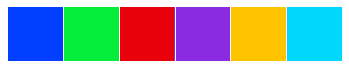

In [11]:
sns.palplot(sns.color_palette(palette='bright'))
sns.set_palette(sns.color_palette(palette='bright'))
sns.set_style('darkgrid')

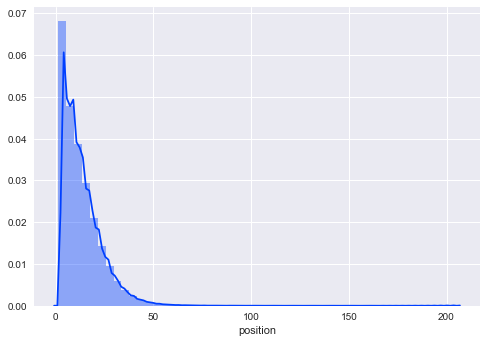

In [12]:
dplt = sns.distplot(input["position"])
# ay = dplt.axes
# ay.set_yscale('log')
dplt

In [13]:
import glove

symbols = {'.': 0}

def getSymbolEmbedding(symbol):
    if symbol not in symbols:
        res = len(symbol)
        symbols[symbol] = res
        return res
    else:
        return symbols[symbol]

In [14]:
symbols_in_word = 8

In [15]:
X_w_all = []
X_c1_all = []
X_c2_all = []
Y_all = []
lastId = 777
lastRowC1 = None
lastRowC2 = None
lastRowW = None
lastY = None
for row in input.iterrows():
    r = row[1]
    if r['position'] != lastId + 1:
        if lastRowW != None:
            X_c1_all.append(lastRowC1)
            X_c2_all.append(lastRowC2)
            X_w_all.append(lastRowW)
            Y_all.append(lastY)
        lastRowC1 = []
        lastRowC2 = []
        lastRowW = []
        lastY = []

    lastRowW.append(glove.getWord(r['token'].upper()))
    ce = [getSymbolEmbedding(s) for s in r['token']]
    lastRowC1.append(np.concatenate((ce, np.zeros(symbols_in_word)))[:symbols_in_word])
    lastRowC2.append(np.concatenate((np.zeros(symbols_in_word), ce))[:symbols_in_word])

    lastY.append(np.where(allclasses == r['class'])[0][0])
    lastId = r['position']


    # if lastId==50:
    #     break

In [16]:
charLen = len(symbols)
print (charLen)

157


In [17]:
allLen = len(X_c1_all)
print(allLen)

48170


In [126]:
X_w_train = X_w_all[:(allLen*4//5)]
X_c1_train = X_c1_all[:(allLen*4//5)]
X_c2_train = X_c2_all[:(allLen*4//5)]
Y_train = Y_all[:(allLen*4//5)]

In [131]:
pad_size = 30

In [132]:
from keras.preprocessing.sequence import pad_sequences

Y_train = pad_sequences(Y_train, maxlen=45, padding='post', truncating='post', value=len(allclasses))
X_w_train = pad_sequences(X_w_train, maxlen=45, padding='post', truncating='post', value=np.zeros(100), dtype=np.ndarray)

X_c1_train = pad_sequences(X_c1_train, maxlen=45, padding='post', truncating='post', value=np.zeros(symbols_in_word), dtype=np.ndarray)

X_c2_train = pad_sequences(X_c2_train, maxlen=45, padding='post', truncating='post', value=np.zeros(symbols_in_word), dtype=np.ndarray)

In [138]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_train, len(allclasses) + 1)

In [133]:
print(X_w_train[0][0])

[0.019541539251804352 0.04051114618778229 -0.14455434679985046
 -0.023119205608963966 -0.014343149028718472 -0.1058046966791153
 -0.06170971691608429 -0.031557366251945496 -0.04887041449546814
 -0.028167886659502983 -0.051981836557388306 -0.001233171089552343
 -0.03875976428389549 -0.010908490978181362 -0.09234295785427094
 -0.1625058948993683 -0.07307099550962448 -0.07415996491909027
 0.06420242786407471 -0.10676009207963943 -0.05983710289001465
 0.014663448557257652 0.02756314165890217 -0.09080902487039566
 -0.2206847071647644 -0.10351380705833435 0.00923649501055479
 -0.1656467169523239 0.003356310073286295 -0.20642831921577454
 -0.09934539347887039 0.03128361329436302 -0.13565507531166077
 -0.108190156519413 -0.08736740052700043 0.017320824787020683
 -0.04274895787239075 0.11585676670074463 -0.029552266001701355
 -0.11304935067892075 0.05254606902599335 0.052960485219955444
 -0.2079974114894867 0.011140688322484493 -0.08727964758872986
 -0.12477833032608032 -0.09943448752164841 -0.

In [139]:
(X_w_train.shape, Y_train.shape)

((38536L, 45L, 100L), (1734120L, 18L))

In [140]:
Y_train = Y_train.reshape((-1, 45, len(allclasses) + 1))
Y_train.shape

(38536L, 45L, 18L)

In [123]:
def convertTo3d(a):
    return np.asarray([z for z in [y for y in [x for x in a]]])

In [18]:
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
import keras.models

In [27]:
from keras.layers import Input, LSTM, concatenate, Dropout, Bidirectional, Dense
from keras.layers import TimeDistributed
from keras.models import Model

inputLayerCe1 = Input(dtype='int32', shape=(None, symbols_in_word,), name='inputLayerCe1')
embeddingLayer1 = TimeDistributed(Embedding(input_dim=charLen, output_dim=10, trainable=True,
                                            name='embeddingLayer1'), name='TDEmbedding1')(inputLayerCe1)
embeddingLSTM1 = TimeDistributed(LSTM(40, return_sequences=False, name='embeddingLSTM1'), name='TDembeddinglstm1')(embeddingLayer1)

inputLayerCe2 = Input(dtype='int32', shape=(None, symbols_in_word,), name='inputLayerCe2')
embeddingLayer2 = TimeDistributed(Embedding(input_dim=148, output_dim=10, trainable=True,
                                            name='embeddingLayer2'), name='TDEmbedding2')(inputLayerCe2)
embeddingLSTM2 = TimeDistributed(LSTM(40, return_sequences=False, name='embeddingLSTM2'), name='TDembeddinglstm2')(embeddingLayer2)

inputLayerWe = Input(dtype='float32', shape=(None, 100,), name='inputLayerWe')

mergeLayer = concatenate([embeddingLSTM1, embeddingLSTM2], name='mergeLayer')
dropoutLayer = Dropout(0.1, name='dropoutLayer')(mergeLayer)

lstmInput = concatenate([dropoutLayer, inputLayerWe], name='lstmInput')

lstmLayer = Bidirectional(LSTM(50, return_sequences=True, name='lstmLayer'), name='bidirectional2')(lstmInput)
outputLayer = TimeDistributed(Dense(len(allclasses) + 1, activation='softmax', name='outputLayer'),
                              name='TDout')(lstmLayer)

model = Model(inputs=[inputLayerCe1, inputLayerCe2, inputLayerWe], outputs=[outputLayer])
model.compile(optimizer="adam",
              loss='categorical_crossentropy')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
inputLayerCe1 (InputLayer)       (None, None, 8)       0                                            
____________________________________________________________________________________________________
inputLayerCe2 (InputLayer)       (None, None, 8)       0                                            
____________________________________________________________________________________________________
TDEmbedding1 (TimeDistributed)   (None, None, 8, 10)   1570        inputLayerCe1[0][0]              
____________________________________________________________________________________________________
TDEmbedding2 (TimeDistributed)   (None, None, 8, 10)   1480        inputLayerCe2[0][0]              
___________________________________________________________________________________________

In [143]:
model.fit({'inputLayerCe1': X_c1_train, 'inputLayerCe2': X_c2_train, 'inputLayerWe': X_w_train}, Y_train, batch_size=100, epochs=100)

ERROR (theano.gof.opt): Optimization failure due to: local_gpu_softmax_with_bias
ERROR (theano.gof.opt): node: SoftmaxWithBias(dot.0, HostFromGpu.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "C:\tools\Anaconda2\lib\site-packages\theano\gof\opt.py", line 1982, in process_node
    replacements = lopt.transform(node)
  File "C:\tools\Anaconda2\lib\site-packages\theano\sandbox\cuda\opt.py", line 1389, in local_gpu_softmax_with_bias
    gpu_sm = GpuSoftmaxWithBias()(as_cuda_ndarray_variable(x),
  File "C:\tools\Anaconda2\lib\site-packages\theano\sandbox\cuda\basic_ops.py", line 46, in as_cuda_ndarray_variable
    return gpu_from_host(tensor_x)
  File "C:\tools\Anaconda2\lib\site-packages\theano\gof\op.py", line 615, in __call__
    node = self.make_node(*inputs, **kwargs)
  File "C:\tools\Anaconda2\lib\site-packages\theano\sandbox\cuda\basic_ops.py", line 132, in make_node
    dtype=x.dtype)()])
  File "C:\tools\Anaconda2\lib\site-p

00001	#include <Python.h>
00002	#include <iostream>
00003	#include "theano_mod_helper.h"
00004	#include <math.h>
00005	#include <numpy/arrayobject.h>
00006	#include <numpy/arrayscalars.h>
00007	#include <iostream>
00008	#include <time.h>
00009	#include <sys/time.h>
00010	//////////////////////
00011	////  Support Code
00012	//////////////////////
00013	
00014	    extern "C"
00015	    {
00016	
00017	        void xerbla_(char*, void *);
00018	
00019	    /***********/
00020	    /* Level 1 */
00021	    /***********/
00022	
00023	    /* Single Precision */
00024	
00025	        void srot_(const int*, float *, const int*, float *, const int*, const float *, const float *);
00026	        void srotg_(float *,float *,float *,float *);
00027	        void srotm_( const int*, float *, const int*, float *, const int*, const float *);
00028	        void srotmg_(float *,float *,float *,const float *, float *);
00029	        void sswap_( const int*, float *, const int*, float *, const int*);
00030	    

C:\Users\leb-a\AppData\Local\Temp\ccMMnKdG.o: In function `run':
C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:900: undefined reference to `dgemm_'
C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:849: undefined reference to `sgemm_'
C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:845: undefined reference to `sgemm_'
C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:844: undefined reference to `sgemm_'
C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:848: undefined reference to `sgemm_'
C:/Users/leb-a/

00455	            PyArray_STRIDES(tmp)[PyArray_NDIM(tmp)-1] : -1)
00456	            );
00457	                {
00458	        __failure = 4;
00459	        if (!PyErr_Occurred()) {
00460	            PyErr_SetString(PyExc_RuntimeError,
00461	                "Unexpected error in an Op's C code. "
00462	                "No Python exception was set.");
00463	            }
00464	        goto __label_4;}
00465	            }
00466	            // This is a TypeError to be consistent with DEBUG_MODE
00467	            // Note: DEBUG_MODE also tells the name of the container
00468	            if (PyArray_TYPE((PyArrayObject*) py_V3) != NPY_FLOAT64) {
00469	                PyErr_Format(PyExc_TypeError,
00470	                             "expected type_num %d (NPY_FLOAT64) got %d",
00471	                             NPY_FLOAT64, PyArray_TYPE((PyArrayObject*) py_V3));
00472	                {
00473	        __failure = 4;
00474	        if (!PyErr_Occurred()) {
00475	            PyErr_SetString(PyExc_Run

Exception: ('The following error happened while compiling the node', Dot22(InplaceDimShuffle{1,0}.0, SoftmaxGrad.0), '\n', "Compilation failed (return status=1): C:\\Users\\leb-a\\AppData\\Local\\Temp\\ccMMnKdG.o: In function `run':\r. C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:900: undefined reference to `dgemm_'\r. C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:849: undefined reference to `sgemm_'\r. C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:845: undefined reference to `sgemm_'\r. C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:844: undefined reference to `sgemm_'\r. C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:848: undefined reference to `sgemm_'\r. C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:892: undefined reference to `dgemm_'\r. C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:890: undefined reference to `dgemm_'\r. C:/Users/leb-a/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-2.7.13-64/tmpzoaef6/mod.cpp:898: undefined reference to `dgemm_'\r. collect2.exe: error: ld returned 1 exit status\r. ", '[Dot22(<TensorType(float64, matrix)>, <TensorType(float64, matrix)>)]')

In [28]:
model.load_weights('model1.ks')

In [21]:
def getSymbolEmbedding(symbol):
    if symbol not in symbols:
        res = len(symbol)
        symbols[symbol] = res
        return res
    else:
        return symbols[symbol]

In [22]:
testInput = pd.read_csv('test.csv', delimiter='\t', quoting=csv.QUOTE_NONE, encoding='utf-8')

In [23]:
def getSymbolEmbedding(symbol):
    if symbol not in symbols:
        return len(symbols)-1
    else:
        return symbols[symbol]

In [24]:
X_w_tst = []
X_c1_tst = []
X_c2_tst = []
lastId = 777
lastRowC1 = None
lastRowC2 = None
lastRowW = None
for row in testInput.iterrows():
    r = row[1]
    if r['position'] != lastId + 1:
        if lastRowW != None:
            X_c1_tst.append(lastRowC1)
            X_c2_tst.append(lastRowC2)
            X_w_tst.append(lastRowW)
        lastRowC1 = []
        lastRowC2 = []
        lastRowW = []

    lastRowW.append(glove.getWord(r['token'].upper()))
    ce = [getSymbolEmbedding(s) for s in r['token']]
    lastRowC1.append(np.concatenate((ce, np.zeros(symbols_in_word)))[:symbols_in_word])
    lastRowC2.append(np.concatenate((np.zeros(symbols_in_word), ce))[:symbols_in_word])
    lastId = r['position']
    
X_c1_tst.append(lastRowC1)
X_c2_tst.append(lastRowC2)
X_w_tst.append(lastRowW)

In [25]:
from keras.preprocessing.sequence import pad_sequences
X_w_tst = pad_sequences(X_w_tst, maxlen=139, padding='post', truncating='post', value=np.zeros(100), dtype=np.ndarray)
X_c1_tst = pad_sequences(X_c1_tst, maxlen=139, padding='post', truncating='post', value=np.zeros(symbols_in_word), dtype=np.ndarray)
X_c2_tst = pad_sequences(X_c2_tst, maxlen=139, padding='post', truncating='post', value=np.zeros(symbols_in_word), dtype=np.ndarray)

In [29]:
Y_predicted = model.predict({'inputLayerCe1': X_c1_tst, 'inputLayerCe2': X_c2_tst, 'inputLayerWe': X_w_tst}, batch_size=400)

In [30]:
Y_converted = Y_predicted.argmax(axis=2)
Y_converted.shape

(12380L, 139L)

In [31]:
submission = open('submit.csv', 'w')
submission.write('Id,Prediction\n')

bad = 0
lastId = 777
lastRow = -1
for row in testInput.iterrows():
    r = row[1]
    if r['position'] != lastId + 1:
        lastRow = lastRow + 1
        assert r['position'] == 1
        
    lastId = r['position']

    
    
    yClass = Y_converted[lastRow][lastId-1]
    if yClass == len(allclasses):
        yClass = 12  #punct
        bad = bad+1
    submission.write("{},{}\n".format(r['id'], allclasses[yClass]))

submission.close()
print(bad)

0
